In [7]:
import sklearn.datasets
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
from scipy import io
from scipy import signal
from scipy.io import wavfile
from scipy.fft import fftshift
import seaborn as sns
rng = np.random.default_rng()

In [24]:
cd '/Users/jiahuipeng/OneDrive - California Institute of Technology/hpc/songanalysis'

/Users/jiahuipeng/OneDrive - California Institute of Technology/hpc/songanalysis


In [143]:
datadir = './data/Or154/44/song/'
fname = 'Or154_44328.59178154_5_12_16_26_18.wav'
fs, x = wavfile.read(datadir+fname)

In [144]:
f, t, ps = signal.spectrogram(x, fs, nperseg=300, noverlap=290, nfft=2000)
# plt.hist(np.log(ps))

/var/folders/s_/x4hdz45n3xx5v71m9_spxsw00000gn/T/ipykernel_7087/2155755093.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, np.log(ps), cmap='gist_heat',vmin=-6)


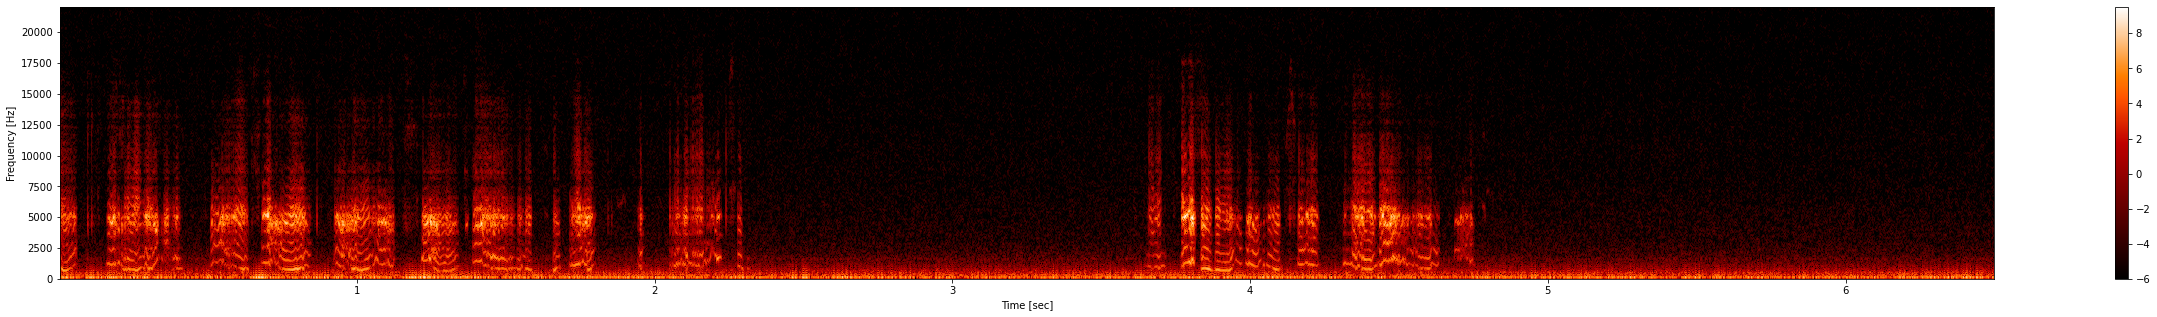

In [145]:
plt.figure(figsize=(t[-1]*20/3,5))
plt.pcolormesh(t, f, np.log(ps), cmap='gist_heat',vmin=-6)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()
plt.savefig('44boutdps')
plt.show()

In [ ]:
def UMAP(plog,tsize,tstep,metric='cosine'):
    
    pwindow = np.empty([1,plog.shape[0],tsize])
    imax = 0
    for i in range(0,round((plog.shape[1]-tsize)/tstep)):
        if i*tstep+tsize > plog.shape[1]:
            break
        pwindow = np.append(pwindow, plog[:, i*tstep:i*tstep+tsize].reshape(1,-1, tsize), axis=0)
        if imax<i:
            imax = i
    print('total window number', imax+1)
    pwindow = pwindow[1:,:,:]
    pwindow[np.isnan(pwindow)] = -1000
    pwindow[np.isinf(pwindow)] = -1000
    print('pwindow shape', pwindow.shape)
    

    T = pwindow.reshape(pwindow.shape[0], -1)
    print('transformed shape', T.shape)
    
    
    reducer = umap.UMAP(metric=metric)
    
    embedding = reducer.fit_transform(T)
    embedding.shape
    
    plot = plt.scatter(
        embedding[:, 0],
        embedding[:, 1],
        s=10,
        alpha=0.5,
        c=np.array(range(0,T.shape[0]))*0.004
        
       )
    plt.colorbar().set_label('time/s')
    print('\nwindow size = '+ str(4*tsize) + 'ms,\nstep = '+ str(4*tstep)+'ms') 
    return plot

In [ ]:
mat = io.loadmat('plog.mat')
plog = np.array(mat['plog'])
plog.shape


In [ ]:
p = plog[:,480:912]
p.shape

In [ ]:
UMAP(p,tsize=5,tstep=1,metric='cosine')